In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,f1_score, recall_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
heart_df = pd.read_csv("heart_v2.csv")
heart_df.head(10)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0
5,65,1,120,177,0
6,56,1,130,256,1
7,59,1,110,239,1
8,60,1,140,293,1
9,63,0,150,407,1


In [ ]:
heart_df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [ ]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


In [ ]:
heart_df.describe()

,age,sex,BP,cholestrol,heart disease
count,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,131.344444,249.659259,0.444444
std,9.109067,0.468195,17.861608,51.686237,0.497827
min,29.000000,0.000000,94.000000,126.000000,0.000000
25%,48.000000,0.000000,120.000000,213.000000,0.000000
50%,55.000000,1.000000,130.000000,245.000000,0.000000
75%,61.000000,1.000000,140.000000,280.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000


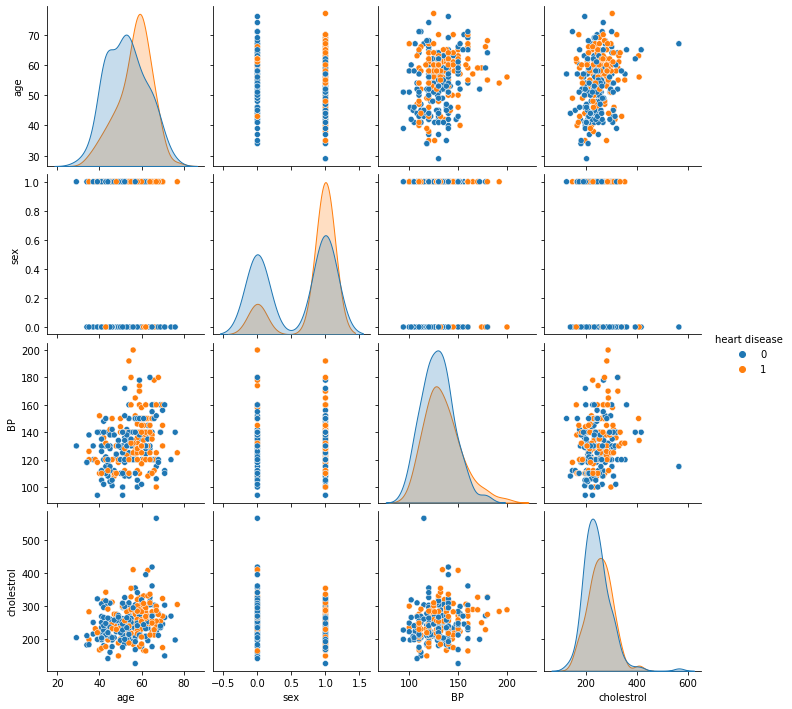

In [ ]:
#plt.figure(figsize=(9,6))
sns.pairplot(data=heart_df, x_vars = ['age','sex','BP','cholestrol'],y_vars=['age','sex','BP','cholestrol'],hue ='heart disease')
plt.show()

In [ ]:
heart_train_df, heart_test_df = train_test_split(heart_df,train_size=0.70, test_size = 0.30, random_state = 42)
print(heart_train_df.shape)
print(heart_test_df.shape)

(189, 5)
(81, 5)


0    0.534392
1    0.465608
Name: heart disease, dtype: float64


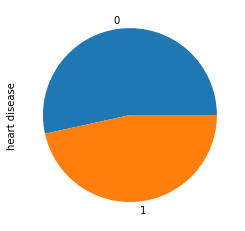

In [ ]:
print(heart_train_df['heart disease'].value_counts(normalize=True))
heart_train_df['heart disease'].value_counts(normalize=True).plot.pie()
plt.show()

In [ ]:
y_train = heart_train_df.pop('heart disease')
X_train = heart_train_df

y_test = heart_test_df.pop('heart disease')
X_test = heart_test_df

In [ ]:
scal_var=['age',	'BP',	'cholestrol']
scale = StandardScaler()
X_train[scal_var] = scale.fit_transform(X_train[scal_var])
X_test[scal_var] = scale.transform(X_test[scal_var])

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=1,p=2,metric='minkowski')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
y_train_pred = model_knn.predict(X_train)

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[101,   0],
       [  0,  88]])

In [ ]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00        88

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



In [ ]:
recall_score(y_train,y_train_pred)

1.0

In [ ]:
y_test_pred = model_knn.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[31, 18],
       [18, 14]])

In [ ]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63        49
           1       0.44      0.44      0.44        32

    accuracy                           0.56        81
   macro avg       0.54      0.54      0.54        81
weighted avg       0.56      0.56      0.56        81



In [ ]:
recall_score(y_test,y_test_pred)

0.4375

In [ ]:
mean_accuracy=[]
for i in range(1,42):
  model_knn_k = KNeighborsClassifier(n_neighbors=i, p=2,metric='minkowski')
  score = cross_val_score(model_knn_k,X_train,y_train,cv=10)
  mean_accuracy.append(np.mean(score))


In [ ]:
mean_accuracy

[0.6301169590643275,
 0.5821637426900585,
 0.6187134502923975,
 0.6140350877192983,
 0.608187134502924,
 0.5923976608187134,
 0.6400584795321637,
 0.6298245614035088,
 0.6353801169590644,
 0.6195906432748538,
 0.645906432748538,
 0.6616959064327486,
 0.6564327485380117,
 0.645906432748538,
 0.6622807017543859,
 0.6517543859649122,
 0.6570175438596491,
 0.6567251461988304,
 0.6622807017543859,
 0.6622807017543859,
 0.6514619883040935,
 0.6567251461988305,
 0.6567251461988304,
 0.6517543859649122,
 0.662280701754386,
 0.6464912280701754,
 0.6464912280701754,
 0.6412280701754386,
 0.6304093567251461,
 0.6517543859649122,
 0.6464912280701754,
 0.635672514619883,
 0.6251461988304093,
 0.6038011695906432,
 0.6040935672514619,
 0.5982456140350877,
 0.6035087719298246,
 0.5982456140350877,
 0.5982456140350877,
 0.5929824561403508,
 0.5982456140350877]

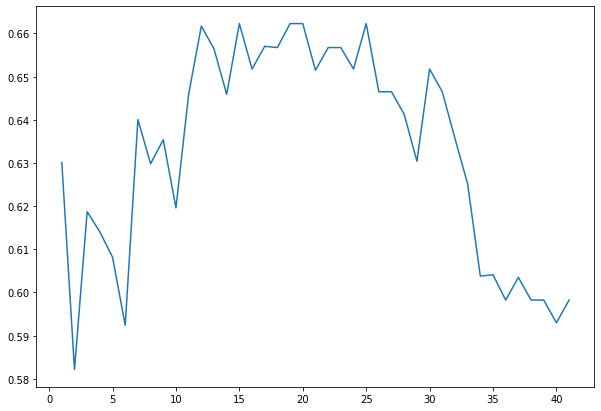

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(list(range(1,42)),mean_accuracy)
plt.show()

In [ ]:
error_rate=[]
for i in range(1,42):
  model_knn_k = KNeighborsClassifier(n_neighbors=i, p=2,metric='minkowski')
  score = cross_val_score(model_knn_k,X_train,y_train,cv=10)
  error_rate.append(1-score.mean())

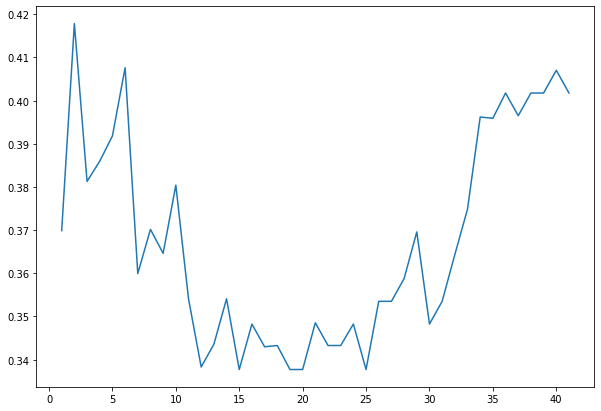

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(list(range(1,42)),error_rate)
plt.show()

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=19,p=2,metric='minkowski')
model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [ ]:
y_test_pred_f = model_knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_test_pred_f))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        49
           1       0.50      0.53      0.52        32

    accuracy                           0.60        81
   macro avg       0.59      0.59      0.59        81
weighted avg       0.61      0.60      0.61        81

